<a href="https://colab.research.google.com/github/nafasovazam89-dotcom/optimal-interpolation-second-derivatives/blob/main/Table_4_m%3D3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:240: SyntaxWarning: invalid escape sequence '\p'
<>:242: SyntaxWarning: invalid escape sequence '\p'
<>:244: SyntaxWarning: invalid escape sequence '\p'
<>:252: SyntaxWarning: invalid escape sequence '\p'
<>:240: SyntaxWarning: invalid escape sequence '\p'
<>:242: SyntaxWarning: invalid escape sequence '\p'
<>:244: SyntaxWarning: invalid escape sequence '\p'
<>:252: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-963036747.py:240: SyntaxWarning: invalid escape sequence '\p'
  label='Optimal: $|\phi(z) - P_{\\phi}(z)|$')
/tmp/ipython-input-963036747.py:242: SyntaxWarning: invalid escape sequence '\p'
  label='Hermite: $|\phi(z) - H(z)|$')
/tmp/ipython-input-963036747.py:244: SyntaxWarning: invalid escape sequence '\p'
  label='Cubic Spline: $|\phi(z) - S(z)|$')
/tmp/ipython-input-963036747.py:252: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('Absolute Error $|\phi(z) - P(z)|$', fontsize=14)


INTERPOLATION METHODS COMPARISON FOR φ(x) = x²e⁻ˣ
CALCULATING DATA FOR TABLE 4
N= 10, h=0.100:
  Optimal:        2.43e-06
  Hermite:        2.88e-06
  Cubic Spline:   9.74e-04
  Improvement (Optimal/Spline): 401.7x
------------------------------------------------------------
N= 20, h=0.050:
  Optimal:        1.57e-07
  Hermite:        1.87e-07
  Cubic Spline:   2.45e-04
  Improvement (Optimal/Spline): 1559.2x
------------------------------------------------------------
N= 50, h=0.020:
  Optimal:        4.11e-09
  Hermite:        4.92e-09
  Cubic Spline:   3.93e-05
  Improvement (Optimal/Spline): 9556.1x
------------------------------------------------------------
N=100, h=0.010:
  Optimal:        2.59e-10
  Hermite:        3.10e-10
  Cubic Spline:   9.82e-06
  Improvement (Optimal/Spline): 37968.5x
------------------------------------------------------------

CREATING SIMPLE ERROR PLOT FOR N=100 (Log Scale)
Calculating optimal interpolation...
Calculating Hermite interpolation...
Calcu

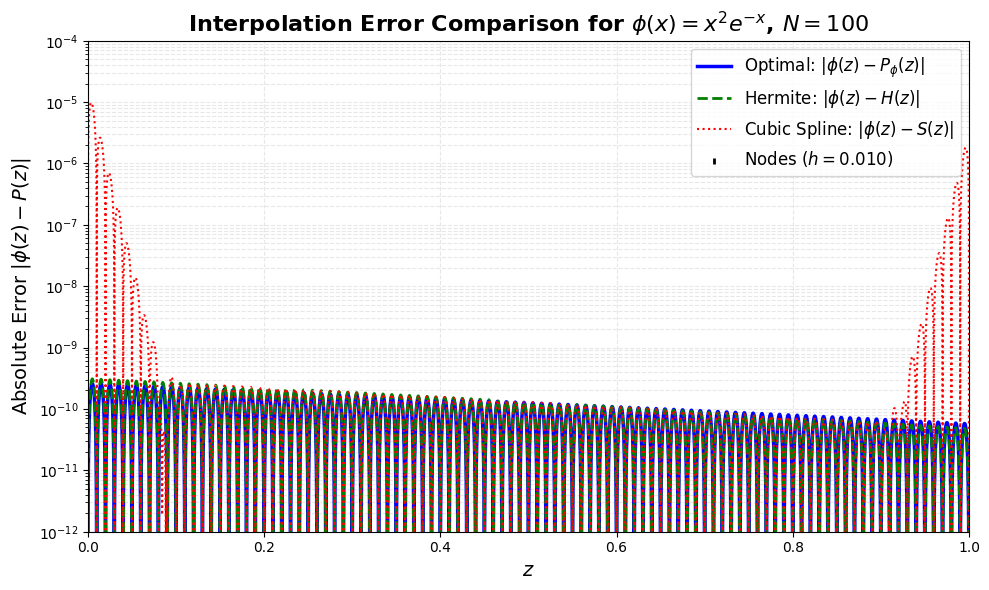


STATISTICS (Maximum Errors):
--------------------------------------------------
Optimal:        2.59e-10
Hermite:        3.10e-10
Cubic Spline:   9.82e-06
--------------------------------------------------
Optimal improvement over Cubic Spline: 37968.5x
Hermite improvement over Cubic Spline: 31679.5x

SUMMARY
✓ Table 4 data calculated (Optimal, Hermite, Cubic Spline)
✓ Simple error plot created (log scale only)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.interpolate import CubicHermiteSpline

# OPTIMAL INTERPOLATION COEFFICIENTS (Formulas 36-38)
def C_beta0(x, beta, h, N):
    """
    Coefficient C_{beta,0}(x) from formula (4)
    """
    result = np.zeros_like(x)

    if beta == 0:
        mask = (0 <= x) & (x <= h)
        result[mask] = (h - x[mask]) / h
    elif beta == N:
        mask = (h*(N-1) < x) & (x <= 1)
        result[mask] = (h - 1 + x[mask]) / h
    else:
        mask1 = (h*(beta-1) < x) & (x <= h*beta)
        mask2 = (h*beta < x) & (x <= h*(beta+1))
        result[mask1] = (x[mask1] + h - h*beta) / h
        result[mask2] = (h - x[mask2] + h*beta) / h

    return result

def C_beta1(x, beta, h, N):
    """
    Coefficient C_{beta,1}(x) from formula (5)
    """
    result = np.zeros_like(x)

    if beta == 0:
        mask = (0 <= x) & (x <= h)
        result[mask] = (x[mask] * (h - x[mask])) / (2*h)
    elif beta == N:
        mask = (h*(N-1) < x) & (x <= 1)
        result[mask] = ((x[mask] - 1) * (x[mask] - 1 + h)) / (2*h)
    else:
        mask1 = (h*(beta-1) < x) & (x <= h*beta)
        mask2 = (h*beta < x) & (x <= h*(beta+1))
        result[mask1] = ((x[mask1] - h*beta) * (x[mask1] + h - h*beta)) / (2*h)
        result[mask2] = ((x[mask2] - h*beta) * (h - x[mask2] + h*beta)) / (2*h)

    return result

def C_beta2(x, beta, h, N):
    """
    Coefficient C_{beta,2}(x) from formulas (36)-(38)
    """
    result = np.zeros_like(x)
    e2h = np.exp(2*h)
    denom = 1 - e2h  # 1 - e^{2h}

    if beta == 0:
        # Formula (36)
        mask = (0 <= x) & (x <= h)
        x_masked = x[mask]
        term1 = np.exp(x_masked) - np.exp(2*h - x_masked)
        term2 = ((h - x_masked) * (np.exp(h) - 1) / (2*h)) * (2*np.exp(h) + 2 - x_masked*np.exp(h) + x_masked)
        result[mask] = (term1 + term2) / denom

    elif beta == N:
        # Formula (38)
        mask = (h*(N-1) < x) & (x <= 1)
        x_masked = x[mask]
        term1 = np.exp(1 - x_masked) - np.exp(2*h + x_masked - 1)
        term2 = ((h + x_masked - 1) * (np.exp(h) - 1) / (2*h)) * (np.exp(h) + x_masked*np.exp(h) + 3 - x_masked)
        result[mask] = (term1 + term2) / denom

    else:
        # Formula (37)
        mask1 = (h*(beta-1) <= x) & (x <= h*beta)
        x1 = x[mask1]
        term1_1 = np.exp(h*beta - x1) - np.exp(x1 + 2*h - h*beta)
        term2_1 = 2*h*np.exp(h)
        term3_1 = (x1 - h*beta)/(2*h) * (h*(1 + np.exp(h))**2 + (x1 - h*beta)*(1 - np.exp(h))**2)
        term4_1 = (x1 + h - h*beta)/h * (1 - e2h + 2*h*np.exp(h))
        result[mask1] = (term1_1 + term2_1 + term3_1 - term4_1) / denom

        mask2 = (h*beta <= x) & (x <= h*(beta+1))
        x2 = x[mask2]
        term1_2 = np.exp(x2 - h*beta) - np.exp(2*h + h*beta - x2)
        term2_2 = 2*h*np.exp(h)
        term3_2 = -(x2 - h*beta)/(2*h) * (h*(1 + np.exp(h))**2 - (x2 - h*beta)*(1 - np.exp(h))**2)
        term4_2 = (h - x2 + h*beta)/h * (1 - e2h + 2*h*np.exp(h))
        result[mask2] = (term1_2 + term2_2 + term3_2 - term4_2) / denom

    return result

def optimal_interpolation_full(x, f_vals, f_prime_vals, f_double_vals, h, N):
    """
    Full optimal interpolation: P_φ(x) from formula (3)
    """
    result = np.zeros_like(x)
    for beta in range(N+1):
        result += (C_beta0(x, beta, h, N) * f_vals[beta] +
                   C_beta1(x, beta, h, N) * f_prime_vals[beta] +
                   C_beta2(x, beta, h, N) * f_double_vals[beta])
    return result

# TEST FUNCTION: φ(x) = x^2 e^{-x}

def phi(x):
    """φ(x) = x^2 e^{-x}"""
    return x**2 * np.exp(-x)

def phi_prime(x):
    """φ'(x) = (2x - x^2) e^{-x}"""
    return (2*x - x**2) * np.exp(-x)

def phi_double(x):
    """φ''(x) = (2 - 4x + x^2) e^{-x}"""
    return (2 - 4*x + x**2) * np.exp(-x)

# MAIN CALCULATION FOR TABLE 4

def calculate_table4_data():
    """
    Calculate data for Table 4: N = 10, 20, 50, 100
    """
    print("="*80)
    print("CALCULATING DATA FOR TABLE 4")
    print("="*80)

    N_values = [10, 20, 50, 100]
    results = {
        'N': [], 'h': [],
        'Optimal': [], 'Hermite': [], 'Cubic Spline': [],
        'Optimal_vs_Spline': [], 'Hermite_vs_Spline': []
    }

    for N in N_values:
        h = 1.0 / N
        x_nodes = np.linspace(0, 1, N+1)

        # Function values at nodes
        f_vals = phi(x_nodes)
        f_prime_vals = phi_prime(x_nodes)
        f_double_vals = phi_double(x_nodes)

        # Evaluation points (excluding nodes)
        n_eval = 10001
        x_eval = np.linspace(0, 1, n_eval)
        # Remove nodes
        for node in x_nodes:
            x_eval = x_eval[np.abs(x_eval - node) > 1e-12]

        # True function
        f_true = phi(x_eval)

        # 1. OPTIMAL INTERPOLATION (Our method)
        f_opt = optimal_interpolation_full(x_eval, f_vals, f_prime_vals, f_double_vals, h, N)
        error_opt = np.abs(f_opt - f_true)
        max_error_opt = np.max(error_opt)

        # 2. HERMITE INTERPOLATION (using first derivatives only)
        hermite = CubicHermiteSpline(x_nodes, f_vals, f_prime_vals)
        f_hermite = hermite(x_eval)
        error_hermite = np.abs(f_hermite - f_true)
        max_error_hermite = np.max(error_hermite)

        # 3. CUBIC SPLINE (natural)
        cs = CubicSpline(x_nodes, f_vals, bc_type='natural')
        f_spline = cs(x_eval)
        error_spline = np.abs(f_spline - f_true)
        max_error_spline = np.max(error_spline)

        # Improvement factors
        improvement_opt_vs_spline = max_error_spline / max_error_opt
        improvement_hermite_vs_spline = max_error_spline / max_error_hermite

        # Store results
        results['N'].append(N)
        results['h'].append(h)
        results['Optimal'].append(max_error_opt)
        results['Hermite'].append(max_error_hermite)
        results['Cubic Spline'].append(max_error_spline)
        results['Optimal_vs_Spline'].append(improvement_opt_vs_spline)
        results['Hermite_vs_Spline'].append(improvement_hermite_vs_spline)

        print(f"N={N:3d}, h={h:.3f}:")
        print(f"  Optimal:        {max_error_opt:.2e}")
        print(f"  Hermite:        {max_error_hermite:.2e}")
        print(f"  Cubic Spline:   {max_error_spline:.2e}")
        print(f"  Improvement (Optimal/Spline): {improvement_opt_vs_spline:.1f}x")
        print("-"*60)

    print("="*80)
    return results

# ERROR PLOT FOR N=100 (SIMPLE LOG SCALE PLOT)
def create_error_plot_N100_simple():
    """
    Create simple error plot |φ(z) - P(z)| for N=100 (Log scale only)
    """
    print("\n" + "="*80)
    print("CREATING SIMPLE ERROR PLOT FOR N=100 (Log Scale)")
    print("="*80)

    N = 100
    h = 1.0 / N
    x_nodes = np.linspace(0, 1, N+1)

    # Function values at nodes
    f_vals = phi(x_nodes)
    f_prime_vals = phi_prime(x_nodes)
    f_double_vals = phi_double(x_nodes)

    # Dense evaluation points
    n_eval = 10001
    x_eval = np.linspace(0, 1, n_eval)

    # True function
    f_true = phi(x_eval)

    # 1. OPTIMAL INTERPOLATION (Our method)
    print("Calculating optimal interpolation...")
    f_opt = optimal_interpolation_full(x_eval, f_vals, f_prime_vals, f_double_vals, h, N)
    error_opt = np.abs(f_opt - f_true)

    # 2. HERMITE INTERPOLATION
    print("Calculating Hermite interpolation...")
    hermite = CubicHermiteSpline(x_nodes, f_vals, f_prime_vals)
    f_hermite = hermite(x_eval)
    error_hermite = np.abs(f_hermite - f_true)

    # 3. CUBIC SPLINE
    print("Calculating cubic spline...")
    cs = CubicSpline(x_nodes, f_vals, bc_type='natural')
    f_spline = cs(x_eval)
    error_spline = np.abs(f_spline - f_true)

    # CREATE SIMPLE PLOT (Log Scale Only)

    plt.figure(figsize=(10, 6))

    # Plot errors on log scale
    plt.semilogy(x_eval, error_opt, 'b-', linewidth=2.5,
                 label='Optimal: $|\phi(z) - P_{\\phi}(z)|$')
    plt.semilogy(x_eval, error_hermite, 'g--', linewidth=2.0,
                 label='Hermite: $|\phi(z) - H(z)|$')
    plt.semilogy(x_eval, error_spline, 'r:', linewidth=1.5,
                 label='Cubic Spline: $|\phi(z) - S(z)|$')

    # Mark nodes
    plt.scatter(x_nodes, np.ones_like(x_nodes) * np.min(error_opt) * 0.5,
                color='black', s=20, marker='|', linewidth=2, zorder=5,
                label=f'Nodes ($h={h:.3f}$)')

    plt.xlabel('$z$', fontsize=14)
    plt.ylabel('Absolute Error $|\phi(z) - P(z)|$', fontsize=14)
    plt.title('Interpolation Error Comparison for $\\phi(x) = x^2 e^{-x}$, $N=100$',
              fontsize=16, fontweight='bold')
    plt.legend(fontsize=12, loc='upper right')
    plt.grid(True, alpha=0.3, linestyle='--', which='both')
    plt.xlim(0, 1)
    plt.ylim(1e-12, 1e-4)

    plt.tight_layout()

    # Save plot
    filename = "error_comparison_simple_N100.pdf"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"\nPlot saved as: {filename}")

    plt.show()

    # Statistics (for information only, not in plot)
    print("\nSTATISTICS (Maximum Errors):")
    print("-"*50)
    print(f"Optimal:        {np.max(error_opt):.2e}")
    print(f"Hermite:        {np.max(error_hermite):.2e}")
    print(f"Cubic Spline:   {np.max(error_spline):.2e}")
    print("-"*50)
    print(f"Optimal improvement over Cubic Spline: {np.max(error_spline)/np.max(error_opt):.1f}x")
    print(f"Hermite improvement over Cubic Spline: {np.max(error_spline)/np.max(error_hermite):.1f}x")

    return {
        'x_eval': x_eval,
        'error_optimal': error_opt,
        'error_hermite': error_hermite,
        'error_spline': error_spline
    }



# ============================================================================
# MAIN EXECUTION
# ============================================================================

if __name__ == "__main__":
    print("="*80)
    print("INTERPOLATION METHODS COMPARISON FOR φ(x) = x²e⁻ˣ")
    print("="*80)

    # 1. Calculate data for Table 4
    table_results = calculate_table4_data()

    # 2. Create simple error plot for N=100 (log scale only)
    plot_results = create_error_plot_N100_simple()

    print("\n" + "="*80)
    print("SUMMARY")
    print("="*80)
    print("✓ Table 4 data calculated (Optimal, Hermite, Cubic Spline)")
    print("✓ Simple error plot created (log scale only)")
    print("="*80)